In [56]:
import easyocr

In [3]:
import os
os.getcwd()

'c:\\Users\\Tobi\\Projects\\Development\\EasyOCR-master\\EasyOCR-master'

In [5]:
from IPython.display import Image

In [14]:
#Image('maps/2780.blank.jpg')

In [57]:
mapreader = easyocr.Reader(['de', 'en'])

In [33]:
def get_labels(filepath):
    with open(filepath, 'r') as f:
        labels = []
        for line in f.readlines():
            labels.append(line.split())
        return labels

In [41]:
def xywh_normalized_to_xywh(xywh_n, size):
    im_w, im_h = size
    w, h = size
    x, y, w, h = xywh_n # x, y center
    x_, y_, w_, h_ = int(x*im_w), int(y*im_h), int(w*im_w), int(h*im_h)
    return x_, y_, w_, h_

def xywh_to_xyminmax(xywh):
    x, y, w, h = xywh # x, y center
    w2, h2 = w // 2, h // 2
    xmin, xmax, ymin, ymax = x - w2, x + w2, y - h2, y + h2
    return xmin, xmax, ymin, ymax

def xywh_to_points(xywh):
    x, y, w, h = xywh # x, y center
    w2, h2 = w // 2, h // 2
    xmin, xmax, ymin, ymax = x - w2, x + w2, y - h2, y + h2
    return xmin, xmax, ymin, ymax

def xyminmax_to_points(xyminmax):
    xmin, xmax, ymin, ymax = xyminmax
    return [
        [xmin, ymin],
        [xmax, ymin],
        [xmax, ymax],
        [xmin, ymax]
    ] 

In [9]:
x, *rem = [0, 'a', 'b', 'f', 'g']

In [16]:
import numpy as np
np.asarray(labels[0], dtype='float32')

array([1.       , 0.0612633, 0.176563 , 0.0905632, 0.0322917],
      dtype=float32)

In [66]:
def get_bounds(labels, im_size):
    bounds = []
    categories = []
    for label in labels:
        category, *xywh_n = label
        category, xywh_n = int(category), np.asarray(xywh_n, dtype=float)
        xywh = xywh_normalized_to_xywh(xywh_n, im_size)
        xyminmax = xywh_to_xyminmax(xywh)
        categories.append(category)
        bounds.append(xyminmax)
    return categories, bounds

def get_rectangles(bounds):
    rects = []
    for xyminmax in bounds:
        points = xyminmax_to_points(xyminmax)
        rect.append(points)
    return rects

In [21]:
import PIL
image = PIL.Image.open('Test/197.jpg')

In [ ]:
def read_labels(filepath, size):
     = get_labels(filepath)


In [87]:
labels = get_labels('detected/Test/labels/197.txt')
ids, bounds = get_bounds(labels, image.size)

In [68]:
bounds

[(21, 139, 154, 184),
 (973, 1301, 92, 132),
 (1003, 1039, 183, 201),
 (1003, 1039, 183, 199),
 (1153, 1303, 100, 130),
 (1173, 1223, 183, 201),
 (147, 195, 157, 183),
 (1090, 1146, 183, 201)]

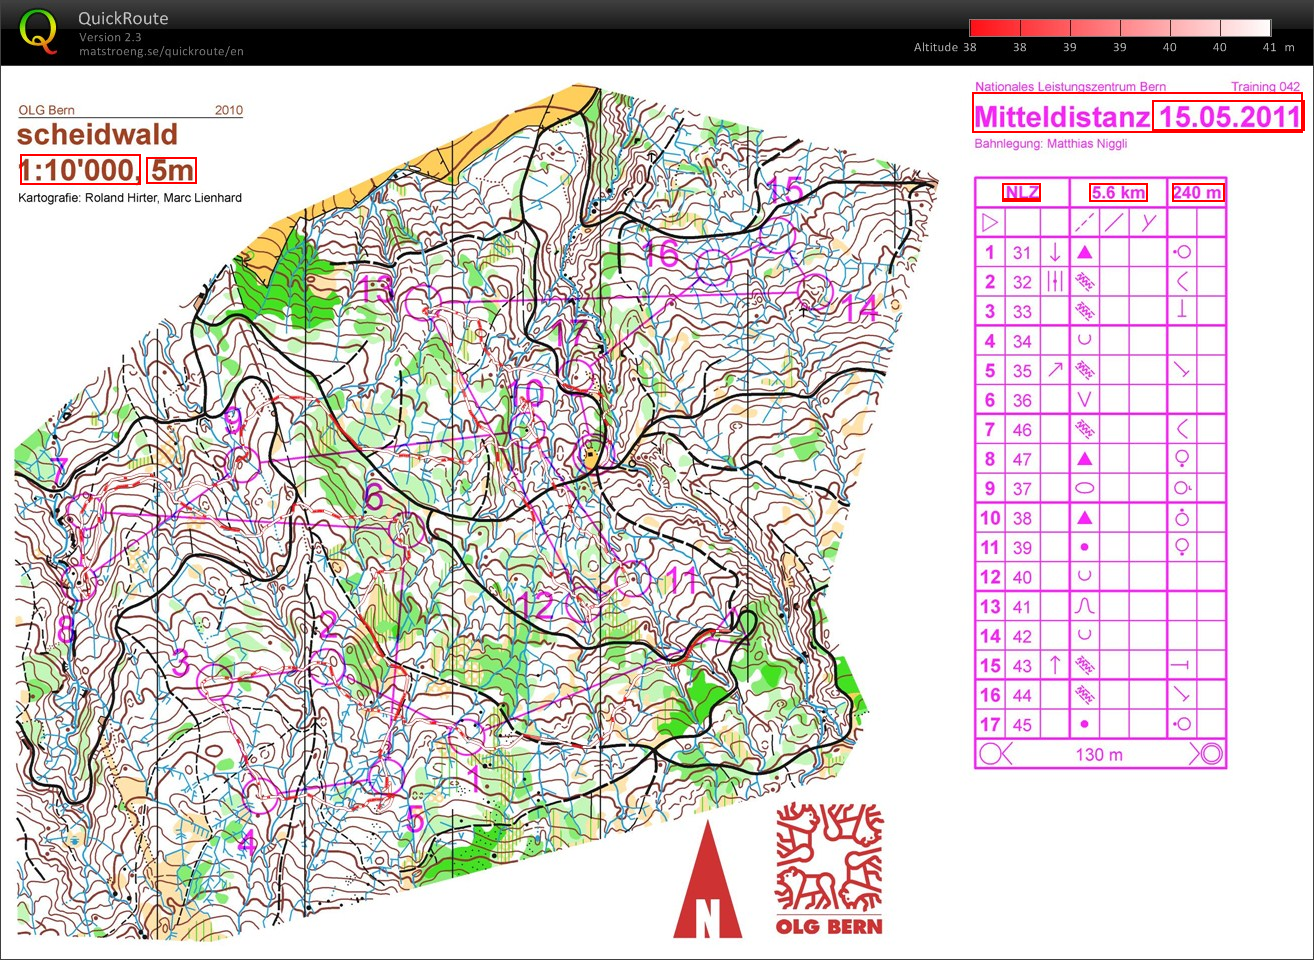

In [54]:
image

In [49]:
from PIL import ImageDraw
def draw_boxes(image, bounds, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)

In [71]:
bounds

[(21, 139, 154, 184),
 (973, 1301, 92, 132),
 (1003, 1039, 183, 201),
 (1003, 1039, 183, 199),
 (1153, 1303, 100, 130),
 (1173, 1223, 183, 201),
 (147, 195, 157, 183),
 (1090, 1146, 183, 201)]

In [73]:
recognized = mapreader.recognize('Test/197.jpg', horizontal_list=bounds, free_list=[])

In [83]:
def get_properties(ids, categories, recognized):
    prop = {}
    for i, entry in enumerate(recognized):
        _, val, conf = entry
        cat_id = ids[i]
        name = categories[cat_id]
        prop[name] = (val, conf)
    return prop


In [85]:
import yaml
def get_categories(filepath):
    with open(filepath, 'r') as file:
        dataset = yaml.full_load(file)
        return dataset['names']

In [86]:
categories = get_categories('dataset/omaps.yaml')

In [88]:
props = get_properties(ids, categories, recognized)

In [89]:
props

{'map_scale': ("1:10'000", 0.9836925003770713),
 'event_name': ('Mitteldistanz 15.05.2011', 0.9886857918933872),
 'course_distance': ('5.6 km', 0.7811694571828393),
 'course_class': ('NLZ', 0.4104270339012146),
 'event_date': ('15.05.2011', 0.8610872258452724),
 'course_elevation': ('240 m', 0.9519266039267643),
 'contours_distance': ('5m', 0.5660725575914355)}

In [ ]:
rbounds = mapreader.detect('Test/197.jpg')

In [60]:
rbounds

([[74, 172, 6, 30],
  [77, 123, 31, 45],
  [77, 247, 45, 61],
  [913, 979, 41, 55],
  [973, 1169, 80, 96],
  [1231, 1303, 81, 97],
  [17, 77, 103, 119],
  [215, 247, 103, 117],
  [972, 1304, 102, 134],
  [12, 183, 115, 153],
  [972, 1131, 135, 154],
  [13, 199, 153, 189],
  [17, 81, 191, 207],
  [85, 245, 191, 205],
  [1003, 1041, 183, 201],
  [1089, 1147, 181, 201],
  [1169, 1223, 181, 201],
  [1130, 1160, 210, 234],
  [836, 884, 292, 324],
  [1011, 1033, 301, 321],
  [1011, 1033, 361, 379],
  [1011, 1035, 391, 409],
  [1013, 1035, 423, 439],
  [1008, 1034, 476, 500],
  [976, 1004, 504, 528],
  [1011, 1035, 509, 527],
  [1011, 1033, 537, 557],
  [660, 702, 566, 598],
  [976, 1004, 532, 590],
  [1011, 1035, 567, 587],
  [976, 1034, 592, 620],
  [976, 1004, 620, 648],
  [1011, 1033, 625, 645],
  [976, 1004, 652, 676],
  [1011, 1035, 655, 675],
  [976, 1004, 682, 706],
  [1011, 1035, 685, 705],
  [976, 1036, 712, 736],
  [1072, 1126, 742, 766],
  [696, 724, 900, 940],
  [774, 886, 914, 9

In [41]:
from pathlib import Path
def draw_boxes_on_image(path):
    fp = Path(path)
    base, _ = os.path.split(path)
    bounds = mapreader.readtext(path)
    image = PIL.Image.open(path)
    draw_boxes(image, bounds)
    image.save(os.path.join(base, fp.stem + '.tmp.' + fp.suffix))

In [18]:
image.save('maps/temp.jpg')

In [33]:
from pathlib import Path
Path('maps/temp.jpg')

WindowsPath('maps/temp.jpg')

In [34]:
os.path.split('maps/temp.jpg')

('maps', 'temp.jpg')

In [42]:
draw_boxes_on_image('maps/2780.blank.jpg')

In [38]:
str(Path('maps/test').with_suffix('.jpg')

'maps\\test.jpg'